In [24]:
library(lme4)
library(tidyr)
library(ggplot2)
library(glmmTMB)
library(scales)
library(DHARMa)
library(lmeresampler)

In [2]:
similarity <- read.csv('../../interneuron-reward-data/processed/ideal_projection_similarity_trial_resolved.csv')

# Convert numeric cell_id and trial_id to factors
similarity[, 'day'] <- as.factor(similarity[, 'day'])
similarity[, 'cell_id'] <- as.factor(similarity[, 'cell_id'])
similarity[, 'trial_id'] <- as.factor(similarity[, 'trial_id'])

# Display first few rows
head(similarity)

day,cell_type,cell_id,mouse_id,trial_id,tone,tone...delay,delay,reward
1,vip,3121,CL136,5094,0.13798489,-0.027988964,-0.14793946,0.03789182
1,vip,3121,CL136,5095,0.11568627,0.176498293,0.12313947,-0.07155153
1,vip,3121,CL136,5096,-0.06912943,0.001183833,0.05824727,0.10211240
1,vip,3121,CL136,5097,0.09978416,0.022661767,-0.05395247,0.01946407
1,vip,3121,CL136,5098,0.07888381,0.032715124,-0.02435786,-0.01549540
1,vip,3121,CL136,5099,0.02274820,-0.038963612,-0.06684784,-0.08558579


In [3]:
summary(similarity)

 day       cell_type      cell_id          mouse_id        trial_id     
 1:63550   pv :21068   2519   :    70   CL176  :19435   1076   :   299  
 7:61322   pyr:76866   2520   :    70   CL182  :16830   1077   :   299  
           vip:26938   2521   :    70   CL174  :14348   1078   :   299  
                       2522   :    70   CL184  :12834   1079   :   299  
                       2523   :    70   CL181  : 8601   1080   :   299  
                       2524   :    70   CL144  : 8024   1081   :   299  
                       (Other):124452   (Other):44800   (Other):123078  
      tone            tone...delay           delay              reward         
 Min.   :-0.753999   Min.   :-0.813267   Min.   :-0.73864   Min.   :-0.770887  
 1st Qu.:-0.079628   1st Qu.:-0.077695   1st Qu.:-0.09904   1st Qu.:-0.099847  
 Median : 0.002089   Median : 0.009654   Median :-0.02201   Median :-0.020976  
 Mean   : 0.026039   Mean   : 0.022457   Mean   : 0.00637   Mean   : 0.004869  
 3rd Qu.: 0.0985

In [11]:
summary(0.5 * similarity[, "reward"] + 0.5)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1146  0.4501  0.4895  0.5024  0.5324  0.9595 

In [12]:
reward.mod <- glmmTMB(
    (0.5 * reward + 0.5) ~ 1 + cell_type*day 
    + (0 + day | cell_id) 
    + (0 + day | mouse_id)
    + (1 | trial_id),
    data=similarity,
    family=beta_family(),
)

saveRDS(reward.mod, '../../interneuron-reward-data/processed/beta_mixed_effects_trial_resolved.rds')

summary(reward.mod)

In [13]:
summary(reward.mod)

 Family: beta  ( logit )
Formula:          
(0.5 * reward + 0.5) ~ 1 + cell_type * day + (0 + day | cell_id) +  
    (0 + day | mouse_id) + (1 | trial_id)
Data: similarity

      AIC       BIC    logLik  deviance  df.resid 
-258440.7 -258304.4  129234.3 -258468.7    124858 

Random effects:

Conditional model:
 Groups   Name        Variance Std.Dev. Corr  
 cell_id  day1        0.009652 0.09825        
          day7        0.023354 0.15282  0.01  
 mouse_id day1        0.002167 0.04655        
          day7        0.004081 0.06388  -0.73 
 trial_id (Intercept) 0.019557 0.13985        
Number of obs: 124872, groups:  cell_id, 1926; mouse_id, 16; trial_id, 1053

Overdispersion parameter for beta family (): 35.1 

Conditional model:
                   Estimate Std. Error z value Pr(>|z|)  
(Intercept)        0.038062   0.022578   1.686   0.0918 .
cell_typepyr      -0.004971   0.031363  -0.158   0.8741  
cell_typevip      -0.055874   0.035127  -1.591   0.1117  
day7               0.01584


	DHARMa nonparametric dispersion test via sd of residuals fitted vs.
	simulated

data:  simulationOutput
ratioObsSim = 0.93749, p-value < 2.2e-16
alternative hypothesis: two.sided


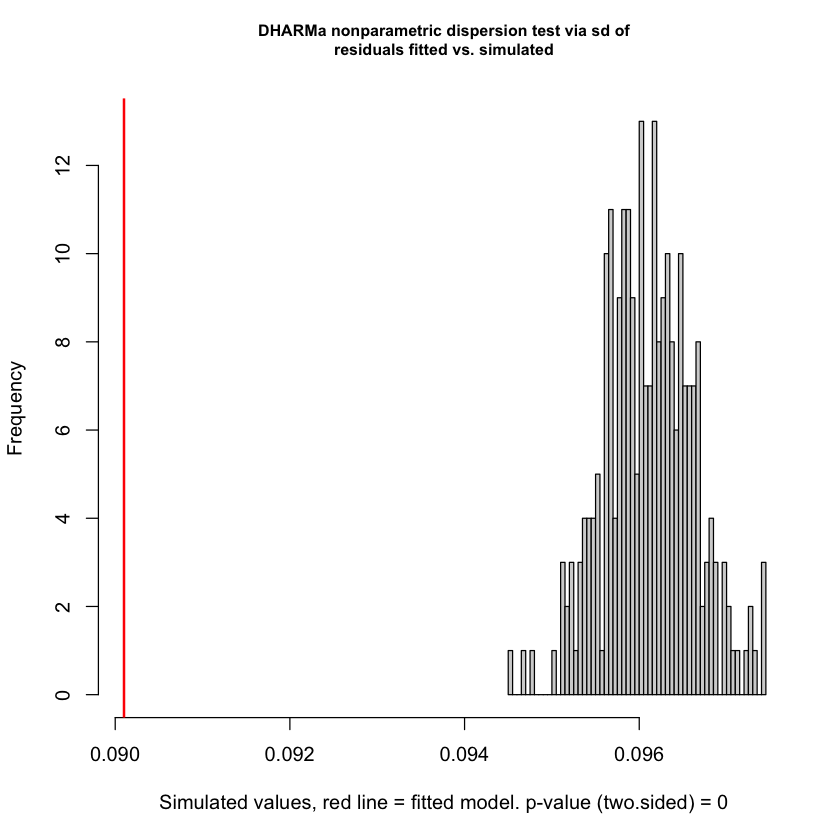

In [21]:
testDispersion(reward.mod)

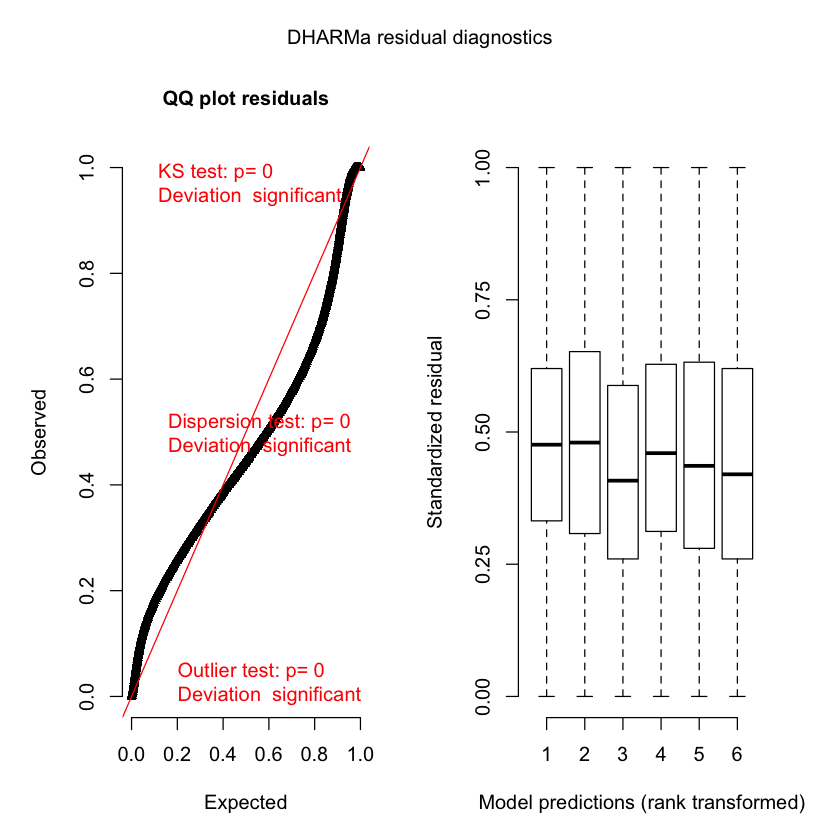

In [22]:
res_diagnostics <- simulateResiduals(reward.mod, plot=TRUE)

In [36]:
methods(class=class(reward.mod))

 [1] anova          coef           confint        df.residual    extractAIC    
 [6] family         fitted         fixef          formula        getME         
[11] getRefit       getSimulations isLMM          logLik         model.frame   
[16] model.matrix   nobs           predict        print          profile       
[21] ranef          refit          residuals      sigma          simulate      
[26] summary        terms          VarCorr        vcov           weights       
see '?methods' for accessing help and source code

In [45]:
logLik(refit(reward.mod, newresp=simulate(reward.mod)))

'log Lik.' 129234.3 (df=14)

In [46]:
logLik(reward.mod)

'log Lik.' 129234.3 (df=14)

In [48]:
bs_ll <- numeric(50)

for (i in 1:50) {
    print(i)
    bs_ll[i] <- logLik(refit(reward.mod, newresp=simulate(reward.mod)))
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24


Timing stopped at: 183.1 13.61 105.8


Original log likelihood was 129236.3

'log Lik.' 129236.3 (df=14)

In [28]:
bootstrap(reward.mod, logLik, "parametric")

ERROR: Error in UseMethod("bootstrap", model): no applicable method for 'bootstrap' applied to an object of class "glmmTMB"


In [4]:
if (FALSE) {
    reward.mod <- lmer(
        reward ~ 1 + cell_type*day 
        + (0 + day | cell_id) 
        + (0 + day | mouse_id)
        + (1 | trial_id),
        data=similarity
    )

summary(reward.mod)
}

Linear mixed model fit by REML ['lmerMod']
Formula: reward ~ 1 + cell_type * day + (0 + day | cell_id) + (0 + day |  
    mouse_id) + (1 | trial_id)
   Data: similarity

REML criterion at convergence: -97601.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9109 -0.5365 -0.0956  0.3504  6.1140 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr 
 cell_id  day1        0.0021421 0.04628       
          day7        0.0049449 0.07032  0.02 
 trial_id (Intercept) 0.0045835 0.06770       
 mouse_id day1        0.0006205 0.02491       
          day7        0.0012895 0.03591  -0.70
 Residual             0.0248372 0.15760       
Number of obs: 124872, groups:  cell_id, 1926; trial_id, 1053; mouse_id, 16

Fixed effects:
                   Estimate Std. Error t value
(Intercept)        0.017689   0.011732   1.508
cell_typepyr      -0.006689   0.016351  -0.409
cell_typevip      -0.029057   0.018304  -1.587
day7               0.007158   0.024617   0.291
cell_typepyr:da

In [15]:
qqnorm(resid(reward.mod))
qqline(resid(reward.mod))

In [16]:
plot(reward.mod)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


In [7]:
plot(cooks.distance(reward.mod))

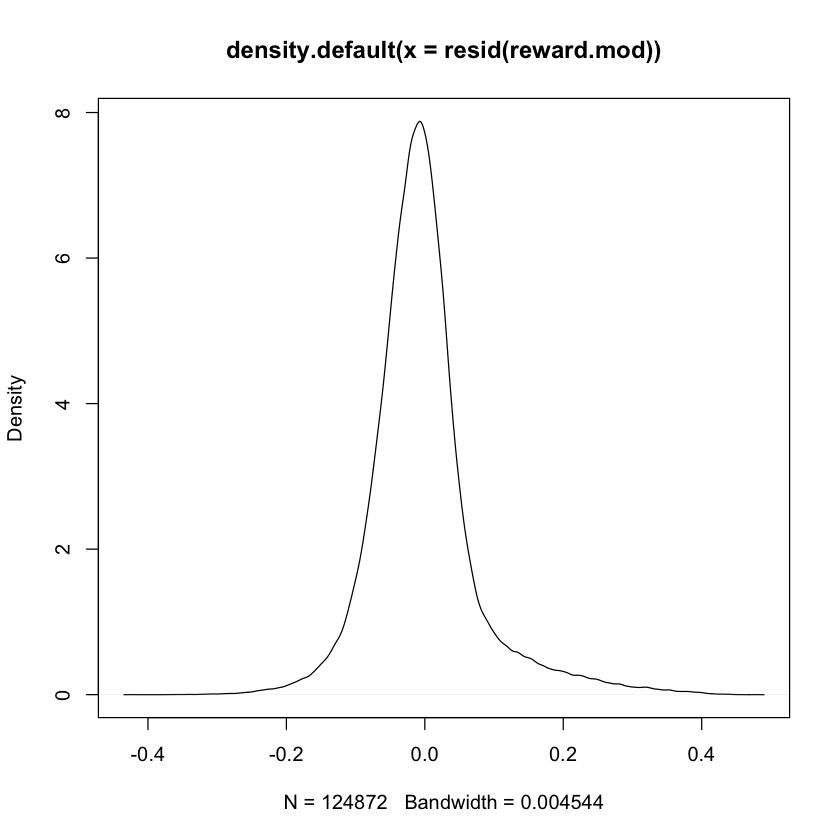

In [17]:
plot(density(resid(reward.mod)))

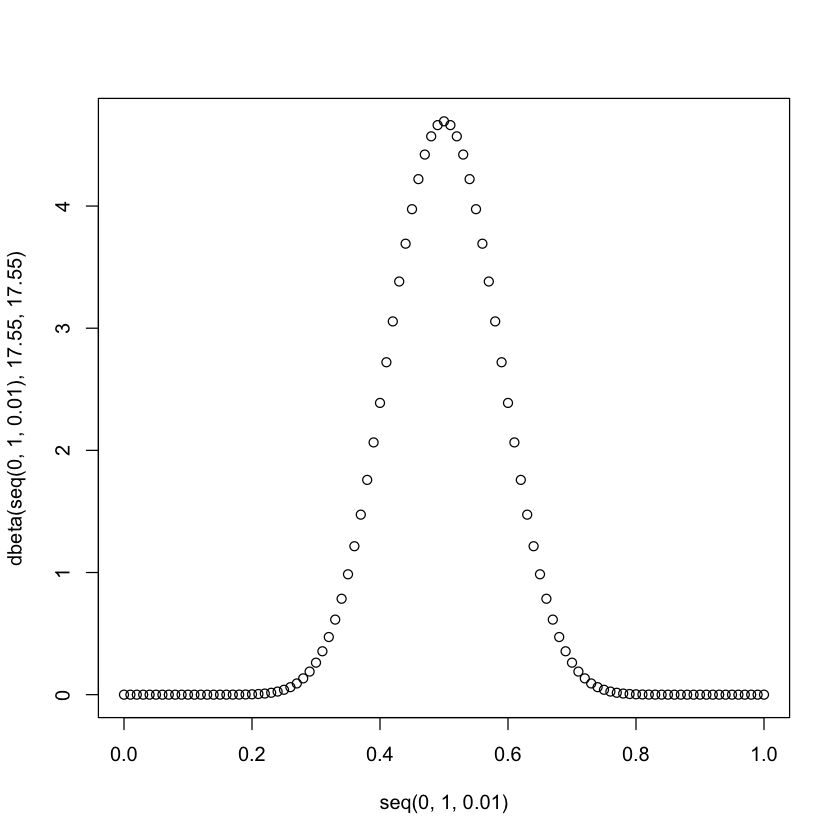

In [23]:
plot(seq(0, 1, 0.01), dbeta(seq(0, 1, 0.01), 17.55, 17.55))

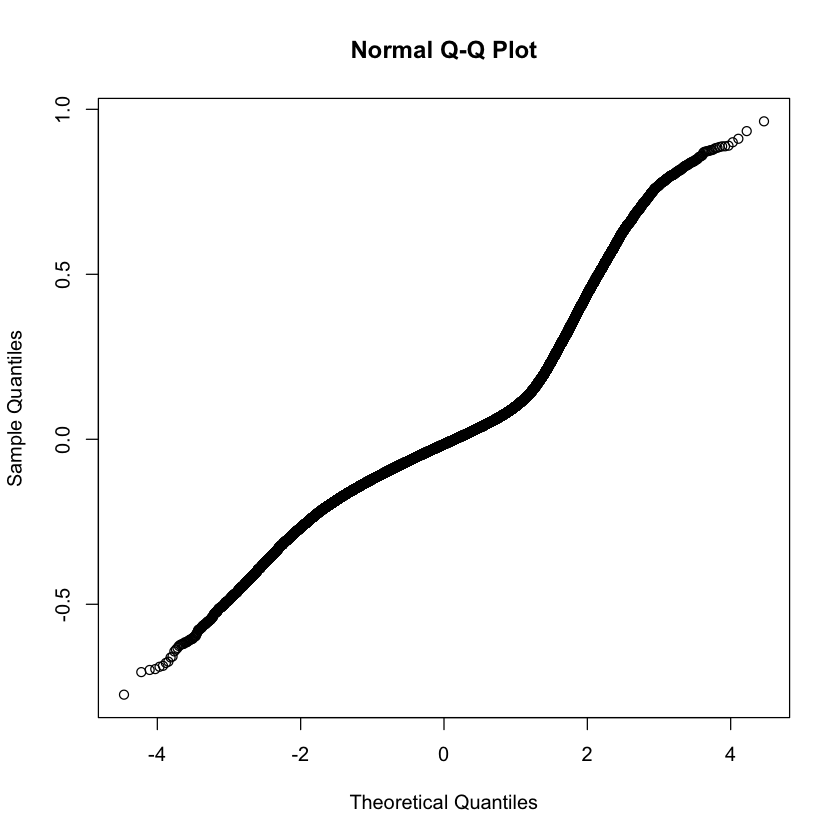

In [19]:
qqnorm(resid(reward.mod))

Warning message in if (datax) {:
“the condition has length > 1 and only the first element will be used”

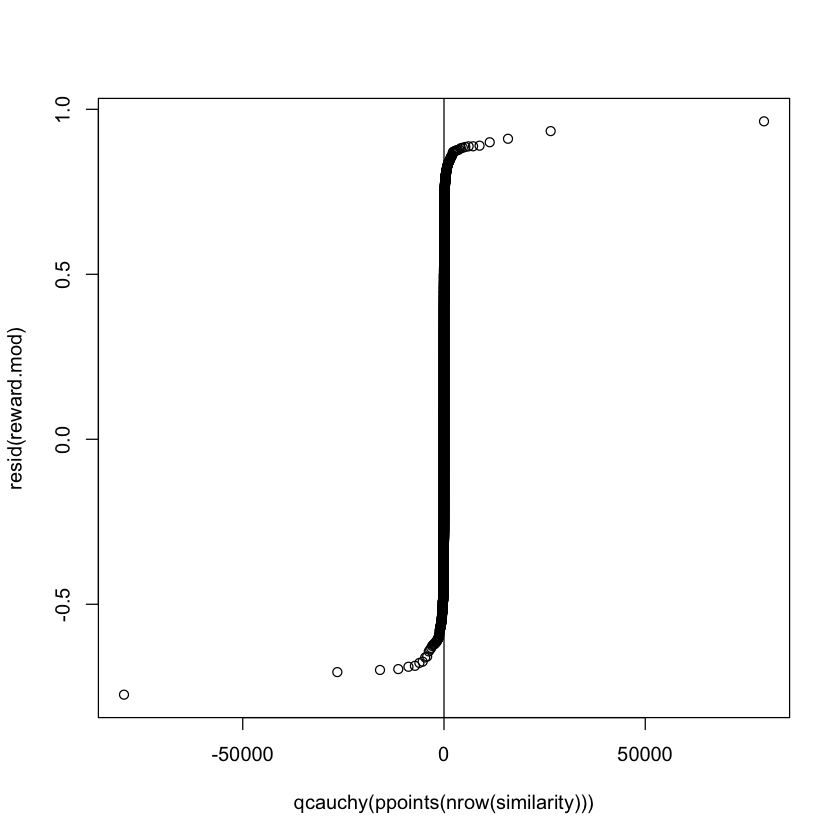

In [20]:
qqplot(qcauchy(ppoints(nrow(similarity))), resid(reward.mod))
qqline(qcauchy(ppoints(nrow(similarity))), resid(reward.mod))

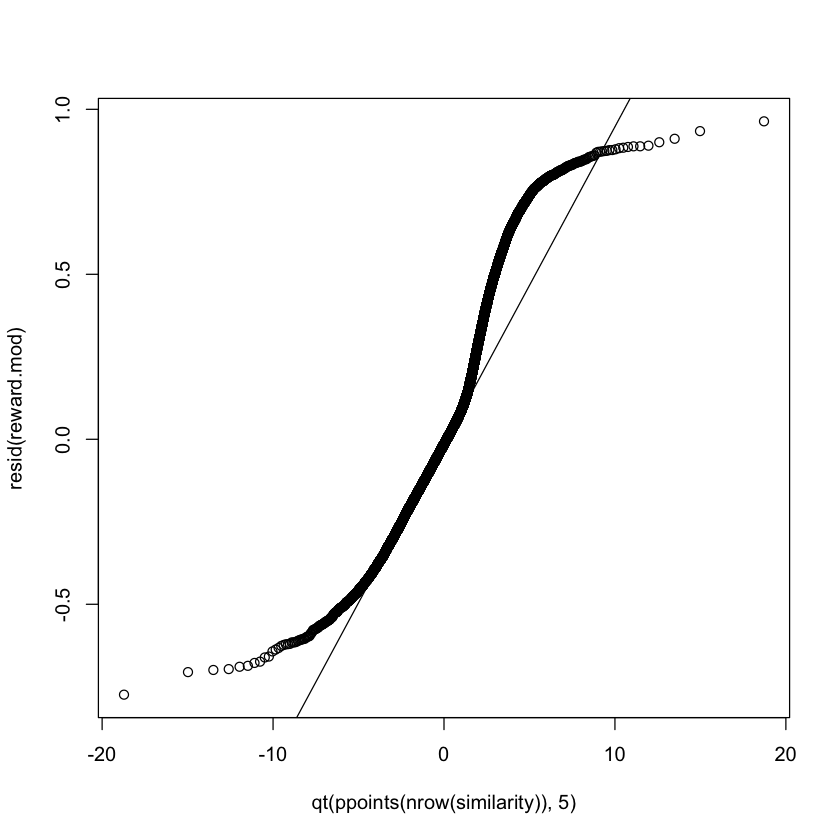

In [44]:
qqplot(qt(ppoints(nrow(similarity)), 5), resid(reward.mod))
qqline(resid(reward.mod), distribution=function(p) qt(p, 5))

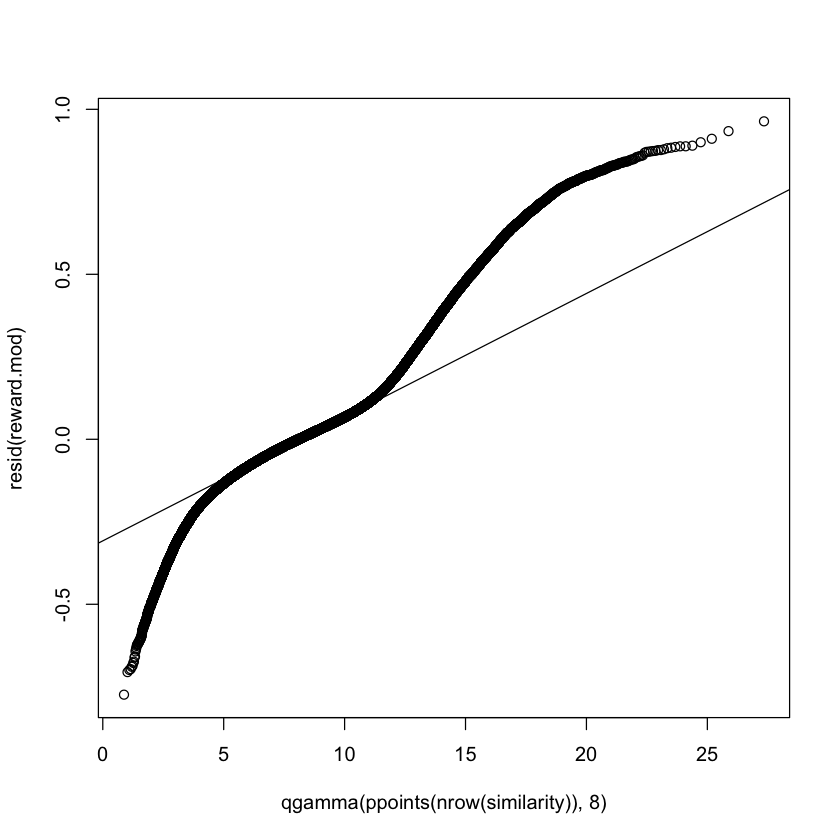

In [38]:
qqplot(qgamma(ppoints(nrow(similarity)), 8), resid(reward.mod))
qqline(resid(reward.mod), distribution=function(p) qgamma(p, 8))

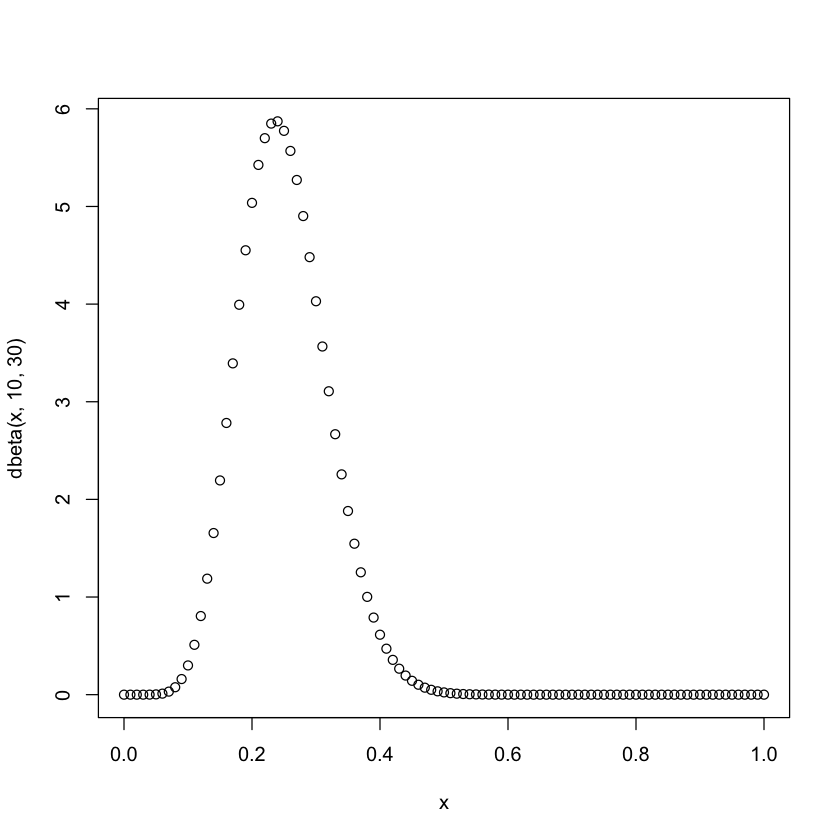

In [80]:
x <- seq(0, 1, 0.01)
plot(x, dbeta(x, 10, 30))